In [12]:
# Chapter 9 Lab: Support Vector Machines

# Support Vector Classifier

set.seed(1)
x=matrix(rnorm(20*2), ncol=2)


In [15]:
y=c(rep(-1,10), rep(1,10))
x[y==1,]=x[y==1,] + 1 # we want to make sure the data is linearly separabel. 


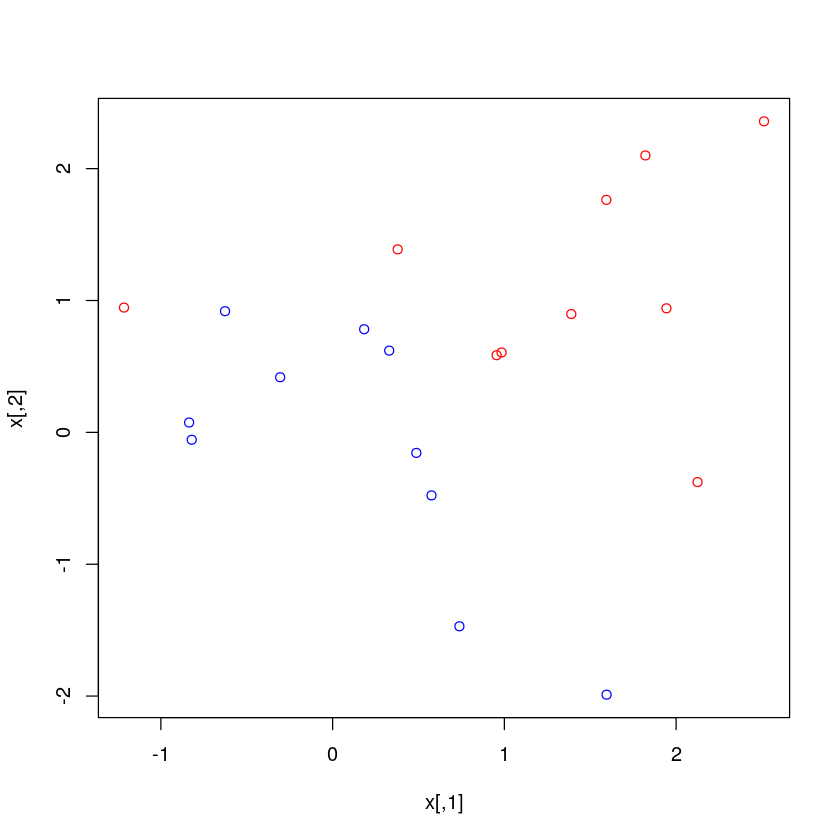

In [17]:
plot(x, col=(3-y))


In [18]:
dat=data.frame(x=x, y=as.factor(y))


In [19]:
dat

x.1,x.2,y
<dbl>,<dbl>,<fct>
-0.6264538,0.91897737,-1
0.1836433,0.78213630,-1
-0.8356286,0.07456498,-1
1.5952808,-1.98935170,-1
0.3295078,0.61982575,-1
-0.8204684,-0.05612874,-1
0.4874291,-0.15579551,-1
0.7383247,-1.47075238,-1
0.5757814,-0.47815006,-1


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1]  1  2  5  7 14 16 17


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




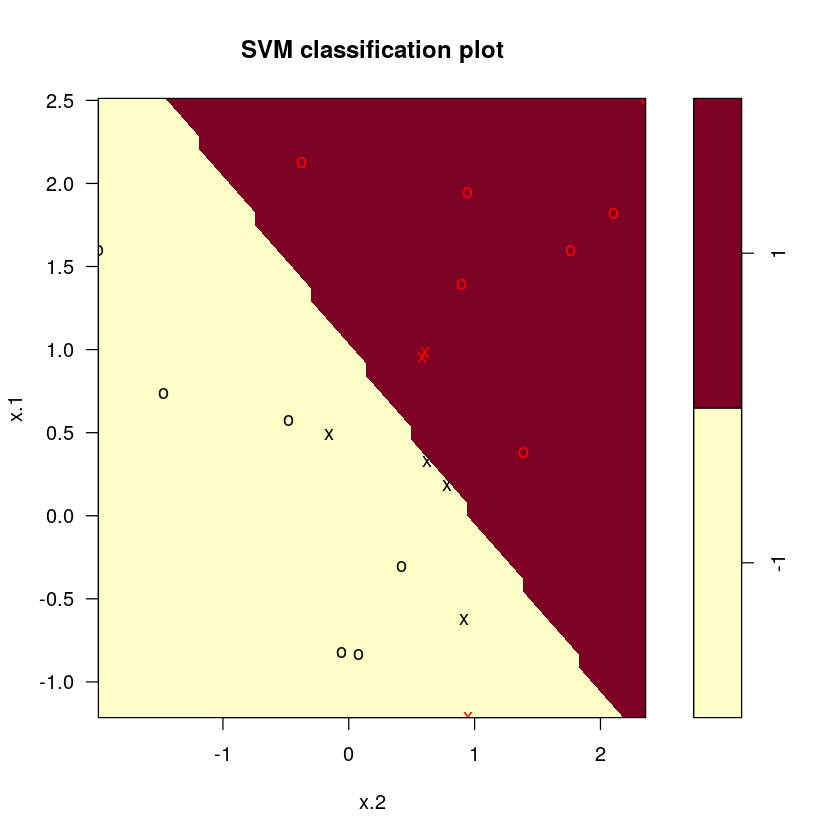

In [4]:
#install.packages('e1071')
library(e1071)
svmfit=svm(y~., data=dat, kernel="linear", cost=10,scale=FALSE)
plot(svmfit, dat)
svmfit$index
summary(svmfit)


[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20

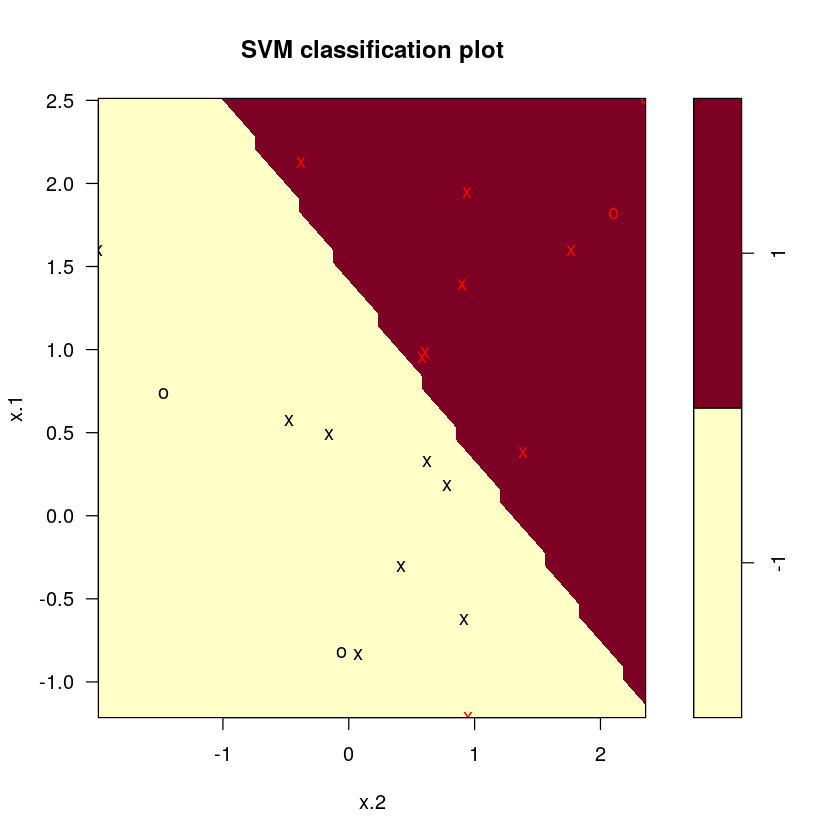

In [20]:
svmfit=svm(y~., data=dat, kernel="linear", cost=0.1,scale=FALSE)
plot(svmfit, dat)
svmfit$index


In [21]:
set.seed(1)
tune.out=tune(svm,y~.,data=dat,kernel="linear",ranges=list(cost=c(0.001, 0.01, 0.1, 1,5,10,100)))
summary(tune.out)



Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.05 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.55  0.4377975
2 1e-02  0.55  0.4377975
3 1e-01  0.05  0.1581139
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229


In [22]:
bestmod=tune.out$best.model
summary(bestmod)



Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




In [23]:
xtest=matrix(rnorm(20*2), ncol=2)
ytest=sample(c(-1,1), 20, rep=TRUE)
xtest[ytest==1,]=xtest[ytest==1,] + 1
testdat=data.frame(x=xtest, y=as.factor(ytest))


In [24]:
ypred=predict(bestmod,testdat)
table(predict=ypred, truth=testdat$y)


       truth
predict -1 1
     -1  9 1
     1   2 8

In [25]:
svmfit=svm(y~., data=dat, kernel="linear", cost=.01,scale=FALSE)
ypred=predict(svmfit,testdat)
table(predict=ypred, truth=testdat$y)


       truth
predict -1  1
     -1 11  6
     1   0  3

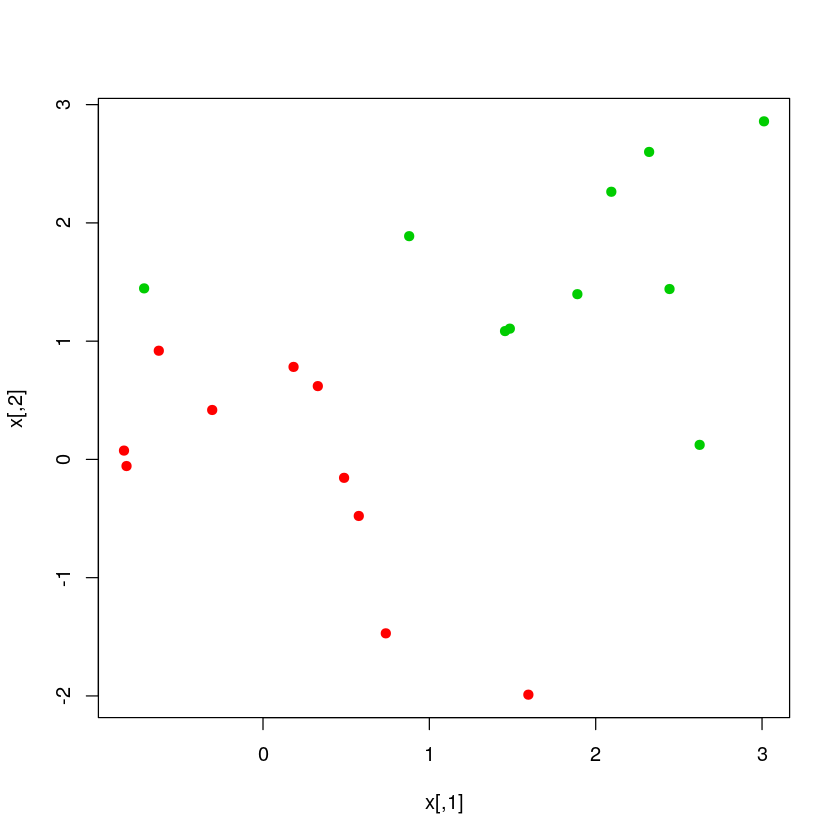

In [26]:
x[y==1,]=x[y==1,]+0.5
plot(x, col=(y+5)/2, pch=19)


In [27]:
dat=data.frame(x=x,y=as.factor(y))
svmfit=svm(y~., data=dat, kernel="linear", cost=1e5)
summary(svmfit)



Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




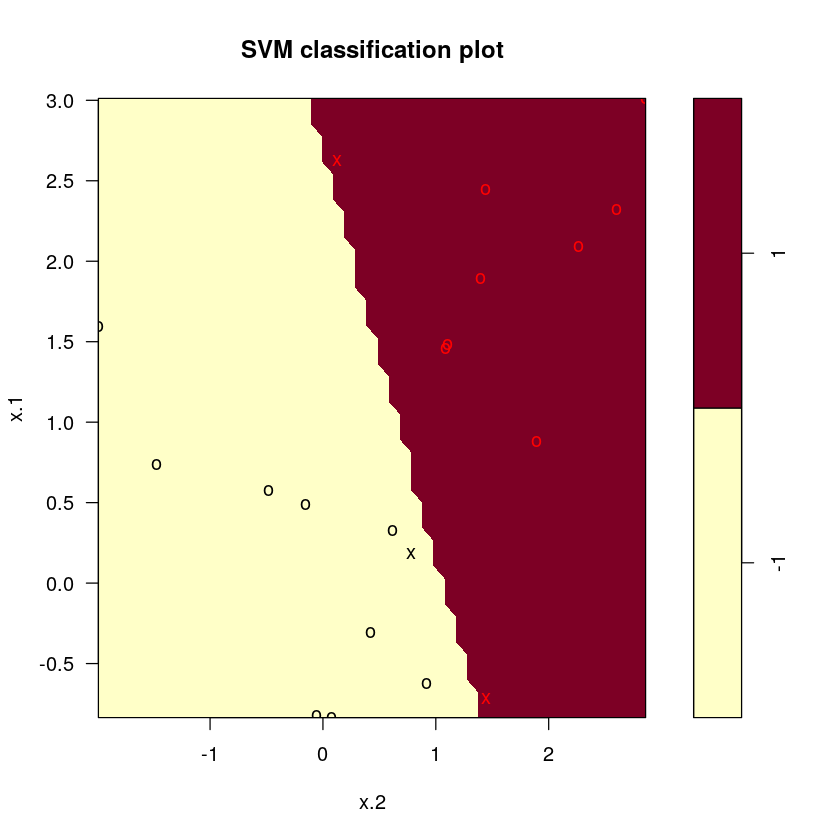

In [28]:
plot(svmfit, dat)



Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




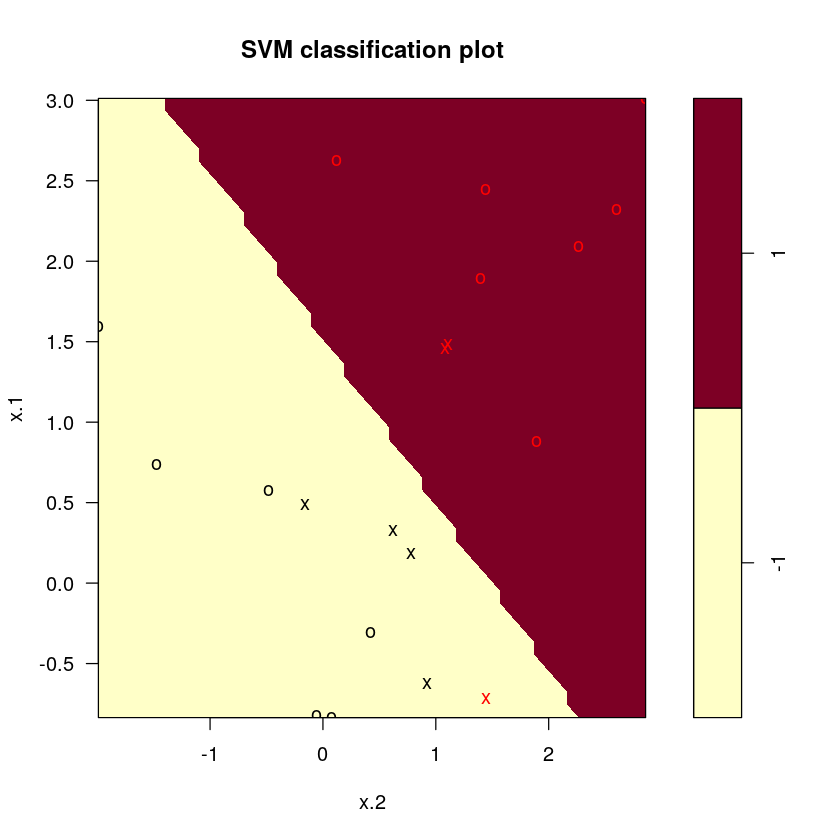

In [29]:
svmfit=svm(y~., data=dat, kernel="linear", cost=1)
summary(svmfit)
plot(svmfit,dat)


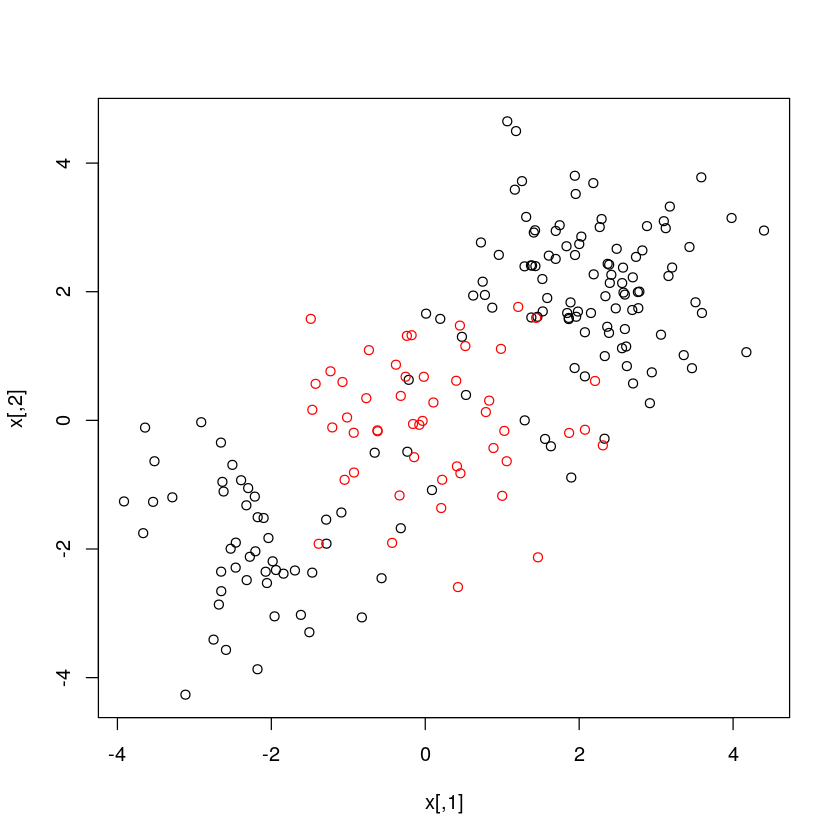

In [30]:
# Support Vector Machine

set.seed(1)
x=matrix(rnorm(200*2), ncol=2)
x[1:100,]=x[1:100,]+2
x[101:150,]=x[101:150,]-2
y=c(rep(1,150),rep(2,50))
dat=data.frame(x=x,y=as.factor(y))
plot(x, col=y)


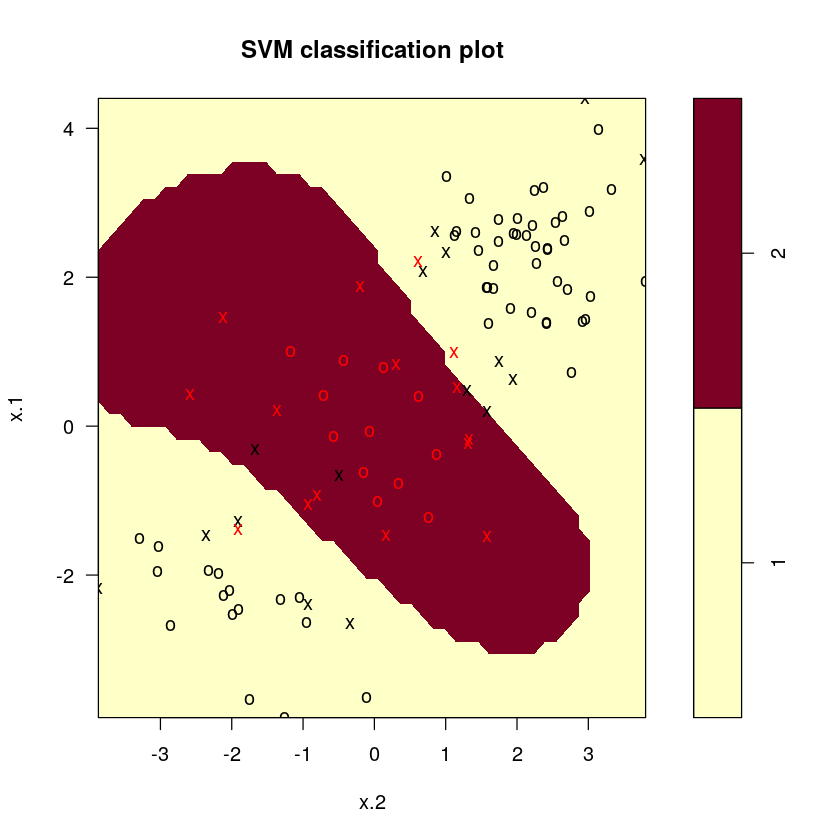

In [31]:
train=sample(200,100)
svmfit=svm(y~., data=dat[train,], kernel="radial",  gamma=1, cost=1)
plot(svmfit, dat[train,])



Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  31

 ( 16 15 )


Number of Classes:  2 

Levels: 
 1 2




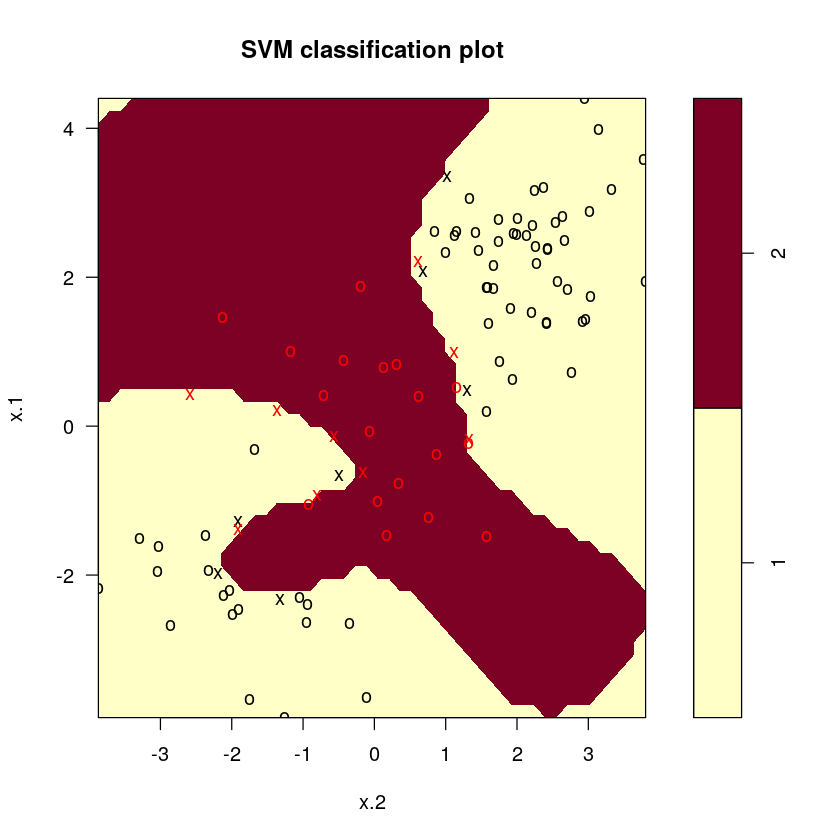

In [32]:
summary(svmfit)
svmfit=svm(y~., data=dat[train,], kernel="radial",gamma=1,cost=1e5)
plot(svmfit,dat[train,])


In [33]:
set.seed(1)
tune.out=tune(svm, y~., data=dat[train,], kernel="radial", ranges=list(cost=c(0.1,1,10,100,1000),gamma=c(0.5,1,2,3,4)))
summary(tune.out)
table(true=dat[-train,"y"], pred=predict(tune.out$best.model,newx=dat[-train,]))



Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.07 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.26 0.15776213
2  1e+00   0.5  0.07 0.08232726
3  1e+01   0.5  0.07 0.08232726
4  1e+02   0.5  0.14 0.15055453
5  1e+03   0.5  0.11 0.07378648
6  1e-01   1.0  0.22 0.16193277
7  1e+00   1.0  0.07 0.08232726
8  1e+01   1.0  0.09 0.07378648
9  1e+02   1.0  0.12 0.12292726
10 1e+03   1.0  0.11 0.11005049
11 1e-01   2.0  0.27 0.15670212
12 1e+00   2.0  0.07 0.08232726
13 1e+01   2.0  0.11 0.07378648
14 1e+02   2.0  0.12 0.13165612
15 1e+03   2.0  0.16 0.13498971
16 1e-01   3.0  0.27 0.15670212
17 1e+00   3.0  0.07 0.08232726
18 1e+01   3.0  0.08 0.07888106
19 1e+02   3.0  0.13 0.14181365
20 1e+03   3.0  0.15 0.13540064
21 1e-01   4.0  0.27 0.15670212
22 1e+00   4.0  0.07 0.08232726
23 1e+01   4.0  0.09 0.07378648
24 1e+02   4.0  0.13 0.14181365
25 1e+03   4.0  0.15 0

    pred
true  1  2
   1 54 23
   2 17  6

In [35]:
# ROC Curves

library(ROCR)
rocplot=function(pred, truth, ...){
   predob = prediction(pred, truth)
   perf = performance(predob, "tpr", "fpr")
   plot(perf,...)}


Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [41]:
svmfit.opt=svm(y~., data=dat[train,], kernel="radial",gamma=2, cost=1,decision.values=T)
fitted=attributes(predict(svmfit.opt,dat[train,],decision.values=TRUE))$decision.values


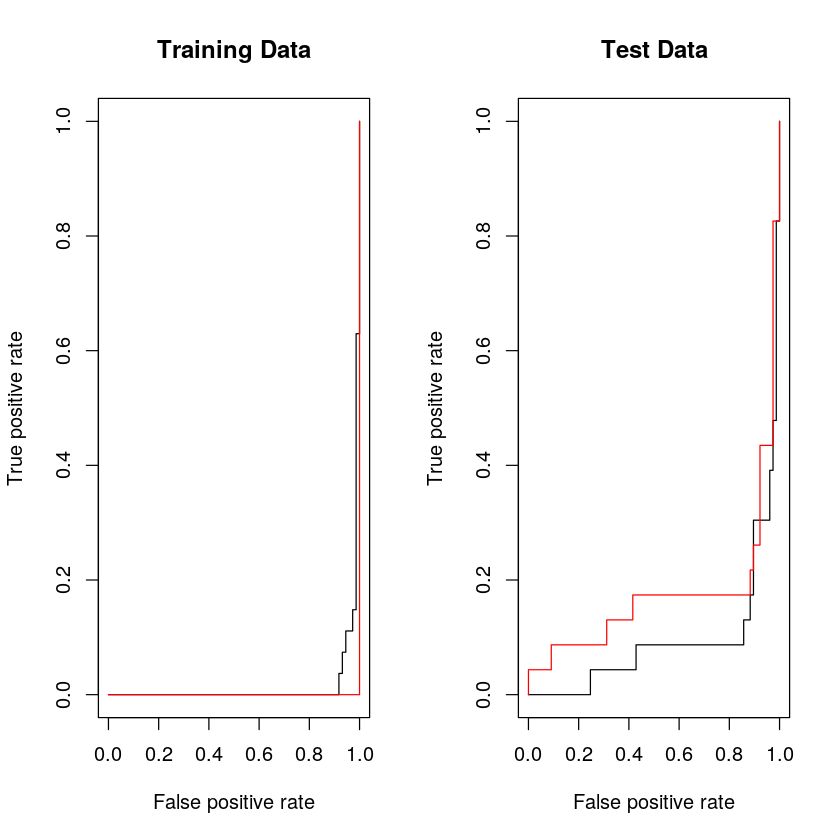

In [43]:
par(mfrow=c(1,2))
rocplot(fitted,dat[train,"y"],main="Training Data")
svmfit.flex=svm(y~., data=dat[train,], kernel="radial",gamma=50, cost=1, decision.values=T)
fitted=attributes(predict(svmfit.flex,dat[train,],decision.values=T))$decision.values
rocplot(fitted,dat[train,"y"],add=T,col="red")
fitted=attributes(predict(svmfit.opt,dat[-train,],decision.values=T))$decision.values
rocplot(fitted,dat[-train,"y"],main="Test Data")
fitted=attributes(predict(svmfit.flex,dat[-train,],decision.values=T))$decision.values
rocplot(fitted,dat[-train,"y"],add=T,col="red")

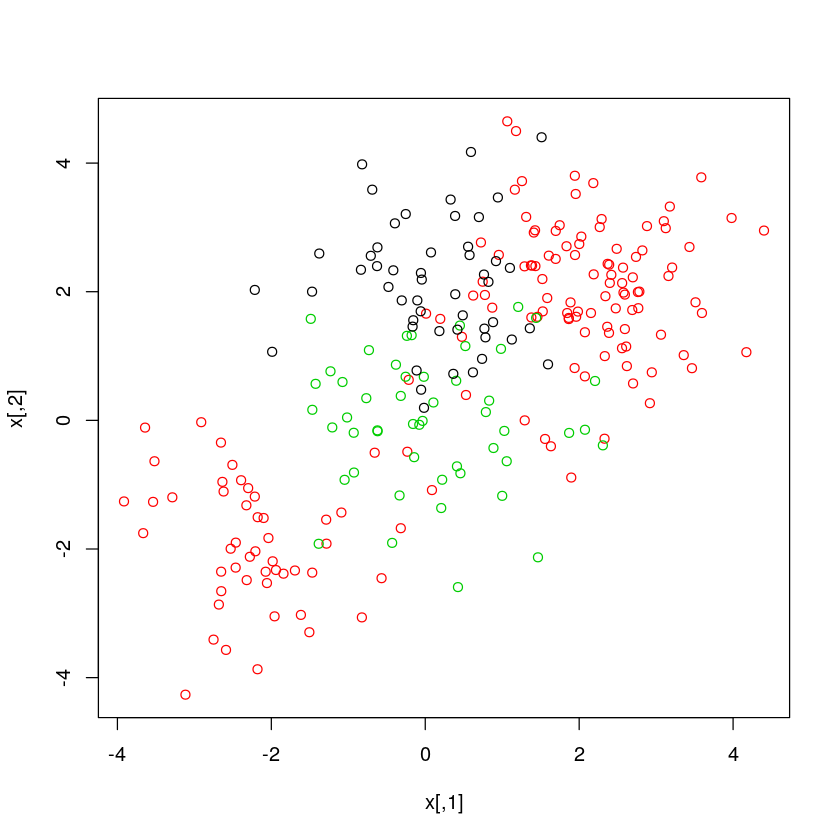

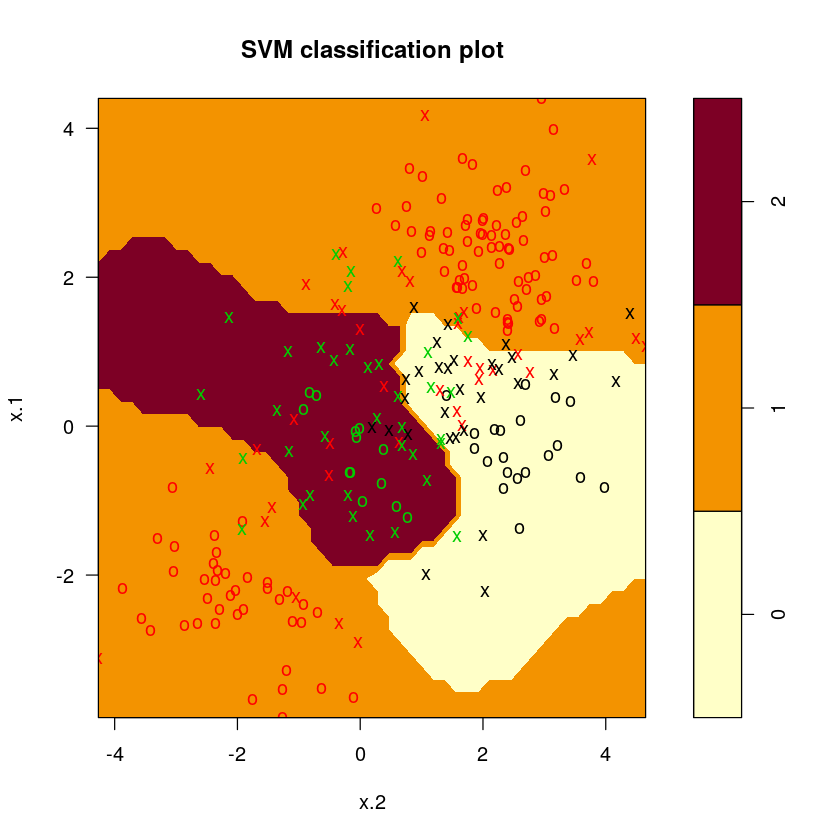

In [44]:
# SVM with Multiple Classes

set.seed(1)
x=rbind(x, matrix(rnorm(50*2), ncol=2))
y=c(y, rep(0,50))
x[y==0,2]=x[y==0,2]+2
dat=data.frame(x=x, y=as.factor(y))
par(mfrow=c(1,1))
plot(x,col=(y+1))
svmfit=svm(y~., data=dat, kernel="radial", cost=10, gamma=1)
plot(svmfit, dat)


In [45]:
# Application to Gene Expression Data

library(ISLR)
names(Khan)
dim(Khan$xtrain)
dim(Khan$xtest)
length(Khan$ytrain)
length(Khan$ytest)
table(Khan$ytrain)
table(Khan$ytest)
dat=data.frame(x=Khan$xtrain, y=as.factor(Khan$ytrain))
out=svm(y~., data=dat, kernel="linear",cost=10)
summary(out)
table(out$fitted, dat$y)
dat.te=data.frame(x=Khan$xtest, y=as.factor(Khan$ytest))
pred.te=predict(out, newdata=dat.te)
table(pred.te, dat.te$y)


[1] "xtrain" "xtest"  "ytrain" "ytest"

[1]   63 2308

[1]   20 2308

[1] 63

[1] 20


 1  2  3  4 
 8 23 12 20 


1 2 3 4 
3 6 6 5 


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




   
     1  2  3  4
  1  8  0  0  0
  2  0 23  0  0
  3  0  0 12  0
  4  0  0  0 20

       
pred.te 1 2 3 4
      1 3 0 0 0
      2 0 6 2 0
      3 0 0 4 0
      4 0 0 0 5